## Importing Dependencies

In [2]:
import numpy as np
import os

import cv2
import matplotlib.pylab as plt

import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
train_dir = 'imgdata_v2/split_dataset/train/'
val_dir = 'imgdata_v2/split_dataset/val/'
test_dir = 'imgdata_v2/split_dataset/test/'

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

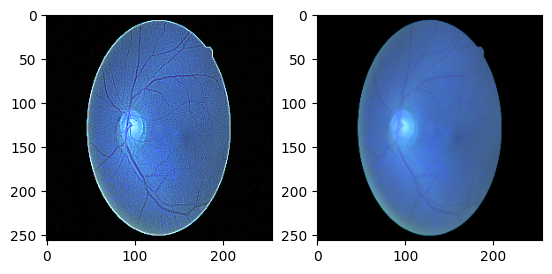

In [39]:
kernel_sharpen = np.array([[-1,-1,-1],
                          [-1,9,-1],
                          [-1,-1,-1]])
def sharpen(img):
    img_sharpen = cv2.filter2D(img, -1, kernel_sharpen)
    return img_sharpen

# img = cv2.resize(cv2.imread(os.path.join(train_dir, 'cataract/cataract_001.png')), (256, 256))

img_sharpen = sharpen(img)

fig, axs = plt.subplots(nrows=1,ncols=2)
axs[0].imshow(img_sharpen.astype(int))
axs[1].imshow(img)

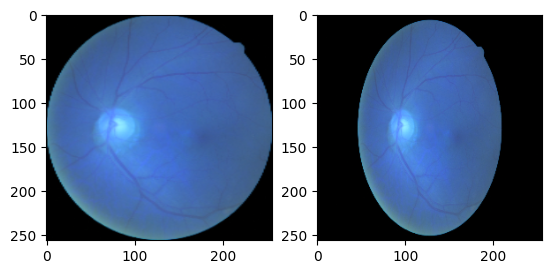

In [42]:
lower = np.array([0,0,0])
higher = np.array([30,30,30])

def crop(img):
    img_copy = img.copy()
    mask = cv2.inRange(img_copy, lower, higher)
    inv_mask = cv2.bitwise_not(mask)

    cont, _ = cv2.findContours(inv_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(img_copy, cont, -1, (0,255,0), 20)

    c = max(cont, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    img_cropped = img[y:y+h,x:x+w]
    return img_cropped

# img = cv2.resize(cv2.imread(os.path.join(train_dir, 'cataract/cataract_001.png')), (256, 256))
img_sharpen = cv2.resize(crop(img), (256, 256))


fig, axs = plt.subplots(nrows=1,ncols=2)
axs[1].imshow(img)
axs[0].imshow(img_sharpen.astype(int))

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   brightness_range=(0.1, 1.5),
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='constant')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(256,256),
                                                    batch_size=16,
                                                    class_mode='binary')

Found 1486 images belonging to 3 classes.


In [11]:
val_datagen = ImageDataGenerator(rescale=1./255)